# مقداردهی اولیه

In [95]:
#%config InlineBackend.figure_format ='jpeg'

url="http://www.tsetmc.com/Loader.aspx?ParTree=151311&i=39610074039667804#"
symbol="kavir"
urlCandleVolume="http://www.tsetmc.com/tsev2/data/Export-txt.aspx?t=i&a=1&b=0&i=43545527030854340"
import os
currentDir=os.getcwd()
FileDirectory=currentDir+"/Files/"
filenameCandleVolume=FileDirectory+symbol+"_CandleVolume.csv"
filenameRealegal=FileDirectory+symbol+"_RealLegal.csv"
print(filenameCandleVolume)
print(filenameRealegal)

/home/me/Programming/TehranStockPriceAnalyser/Files/kavir_CandleVolume.csv
/home/me/Programming/TehranStockPriceAnalyser/Files/kavir_RealLegal.csv


# کندل ها

In [84]:
try:
    import requests
    response=requests.get(urlCandleVolume, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)Chrome/80.0.3987.132 Safari/537.36'})
    f = open(filenameCandleVolume, "wb")
    f.write(response.content)
    f.close()
    print("Done")
except Exception as err:
    print("Error:"+err)

Done


In [86]:
import pandas as pd

dataCandleVolume = pd.read_csv(filenameCandleVolume, quotechar='"', delimiter=",", encoding='utf-8')
dataCandleVolume[:3]

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Sepid.Farab.Kavir,20200408,34900.0,34900.0,32500.0,33054.0,500774254854,15150369,12932,D,33933.0,32699.0
1,Sepid.Farab.Kavir,20200407,34013.0,34013.0,33666.0,33933.0,491194589527,14475575,9952,D,32394.0,34013.0
2,Sepid.Farab.Kavir,20200406,32395.0,32395.0,32200.0,32394.0,604412665748,18657969,5103,D,30853.0,32395.0


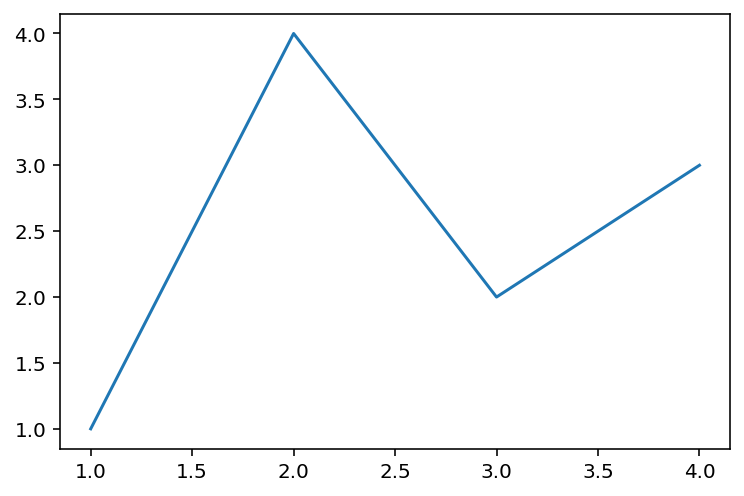

In [88]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

# حقیقی و حقوقی

In [90]:
#http://www.tsetmc.com/Loader.aspx?ParTree=151311&i=43545527030854340#
url="http://www.tsetmc.com/tsev2/data/clienttype.aspx?i=43545527030854340"
import requests
response=requests.get(url)

In [92]:
titleCSV="Date,numberbuyReal,numberbuyLegal,numberSellReal,numberSellLegal,volBuyReal,volBuyLegal,volSellReal,volSellLegal,valueBuyReal,valueBuyLegal,valueSellReal,valueSellLegal\n"
response.content[:]
f = open(filenameRealegal, "w")
f.write(titleCSV)
f.write(str(response.content)[2:-1].replace(";","\n"))
f.close()
print("Done")

Done


In [93]:
import pandas as pd

dataCandleVolume = pd.read_csv(filenameRealegal, quotechar=',', delimiter=",", encoding='utf-8')
dataCandleVolume[:3]

,Date,numberbuyReal,numberbuyLegal,numberSellReal,numberSellLegal,volBuyReal,volBuyLegal,volSellReal,volSellLegal,valueBuyReal,valueBuyLegal,valueSellReal,valueSellLegal
0,20200408,4090,12,5824,12,13110830,2039539,14637006,513363,433621380084,67152874770,483449410969,17324843885
1,20200407,4172,7,3801,5,12460376,2015199,12777001,1698574,423053216853,68141372674,433426790937,57767798590
2,20200406,2711,5,1479,4,18463316,194653,16907694,1750275,598106920028,6305745720,547712707123,56699958625
